In [ ]:
#!pip install ipywidgets
#!pip install opencv-python-headless  # Avoid unnecessary GUI dependencies in Colab
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from torchvision.io import read_video
from re import I
import os
import torch
from torchvision.io import read_video
from IPython.display import HTML, display
from base64 import b64encode
import pandas as pd
import matplotlib.pyplot as plt



Mounted at /content/drive


In [ ]:

def extract_frames(video_path, every_n_frames=1):
    """Extracts frames from a video file."""
    cap = cv2.VideoCapture(video_path)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames = []

    for i in range(frame_count):
        ret, frame = cap.read()

        if i % every_n_frames == 0 and ret:
            frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    cap.release()
    return frames


In [ ]:
def update_frame(change,frame_cords,frames):
    frame_idx = change['new']
    zoom_level = 2
    # Check if there's a line to draw for the current frame
    if frame_idx in frame_cords['Frame'].values:
        # Find the row in the DataFrame for the current frame
        frame_rows = frame_cords[frame_cords['Frame'] == frame_idx]
        # Extract line coordinates
        # Draw the line on the frame
        frame_with_lines = frames[frame_idx].copy()
        for _, row in frame_rows.iterrows():
          x1, y1, x2, y2 = round(row['X1']), round(row['Y1']), round(row['X2']), round(row['Y2'])
          slope = (y2 - y1) / (x2 - x1) if x2 != x1 else float('inf')  # Avoid division by zero

            # Choose the color based on the slope
          color = (255, 0, 0)  # Default color (red) for non-positive slope
          if slope > 0:
              color = (0, 0, 255)  # Blue color for positive slope

          cv2.line(frame_with_lines, (x1, y1), (x2, y2), color=color, thickness=1)
    else:
        frame_with_lines = frames[frame_idx]

    # Resize the frame
    frame_with_lines = cv2.resize(frame_with_lines, None, fx=4, fy=4, interpolation=cv2.INTER_LINEAR)

    # Encode the frame to display in the notebook
    _, encoded_image = cv2.imencode('.png', frame_with_lines)
    encoded_image = b64encode(encoded_image).decode('utf-8')
    image_html = f'<img src="data:image/png;base64,{encoded_image}" style="width: auto; height: auto;">'

    # Update the display with the new image
    display_handle.update(HTML(image_html))

In [ ]:
def analyzeImage(video_path,df,filename):
  df = volumeTraces[volumeTraces['FileName'] ==  filename ]
  print(f'Processing image{filename}')
  print(f'This video has labels from frames: { df.Frame.unique()}')
  frames = extract_frames(video_path, every_n_frames=1)
  frame_slider = widgets.IntSlider(value=0, min=0, max=len(frames)-1, description='Frame:')
  zoom_slider = widgets.FloatSlider(value=1.0, min=0.5, max=4.0, step=0.1, description='Zoom:')

  frame_slider.observe(lambda change: update_frame(change, df,frames), names='value')
  zoom_slider.observe(lambda change: update_frame(change, df,frames), names='value')


  # Display the widgets
  display(widgets.VBox([frame_slider, zoom_slider]))

  # Initial display to show the first frame
  update_frame({'new': frame_slider.value}, df,frames)  # Simulate change dict if needed



In [ ]:

def plot_2_frames_sd(frame_cords,frames,filename):
      # Find the frames where we have lines
      # frames - video data
      # frame_cords - data from csv of a specfic records
      frame_indices = frame_cords['Frame'].unique()
      num_frames = len(frame_indices)
      print(f'We have {num_frames} frames ')
      fig, axs = plt.subplots(1, num_frames, figsize=(15, 5))  # Adjust figsize as needed

      for i, frame_idx in enumerate(frame_indices):
        frame_with_lines = frames[frame_idx].copy()
        frame_rows = frame_cords[frame_cords['Frame'] == frame_idx]

        min_x, min_y = np.inf, np.inf
        max_x, max_y = -np.inf, -np.inf
        for _, row in frame_rows.iterrows():
          x1, y1, x2, y2 = round(row['X1']), round(row['Y1']), round(row['X2']), round(row['Y2'])
          slope = (y2 - y1) / (x2 - x1) if x2 != x1 else float('inf')  # Avoid division by zero
          min_x, min_y = min(min_x, x1, x2), min(min_y, y1, y2)
          max_x, max_y = max(max_x, x1, x2), max(max_y, y1, y2)
          print(min_x)
          # Choose the color based on the slope
          color = (255, 0, 0)  # Default color (red) for non-positive slope
          if slope > 0:
              color = (0, 0, 255)  # Blue color for positive slope

          cv2.line(frame_with_lines, (x1, y1), (x2, y2), color=color, thickness=1)

        cv2.rectangle(frame_with_lines, (min_x, min_y), (max_x, max_y), color=(0, 255, 0), thickness=1)  # Green rectangle

        if num_frames > 1:
            axs[i].imshow(frame_with_lines)
            axs[i].set_title(f'Frame {frame_idx} of {filename}')
            axs[i].axis('off')
        else:
            axs.imshow(frame_with_lines)
            axs.set_title(f'Frame {frame_idx} of {filename}')
            axs.axis('off')

In [ ]:
### Choose file to analyze
volumeTraces = pd.read_csv('/content/drive/MyDrive/YData/Project/VIZ.AI project/EchoNet-Dynamic/VolumeTracings.csv')
folder_path = '/content/drive/MyDrive/YData/Project/VIZ.AI project/EchoNet-Dynamic/Videos/'
filename = '0X4C017259B103AAEE.avi'
video_path = folder_path+filename

In [ ]:
print(filename)
analyzeImage(video_path,volumeTraces,filename)

0X4C017259B103AAEE.avi
Processing image0X4C017259B103AAEE.avi
This video has labels from frames: [ 98 113]


NameError: name 'display_handle' is not defined

We have 2 frames 
52
52
50
50
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
55
55
54
54
54
54
54
54
54
54
54
54
54
54
54
54
53
52
52
52
52


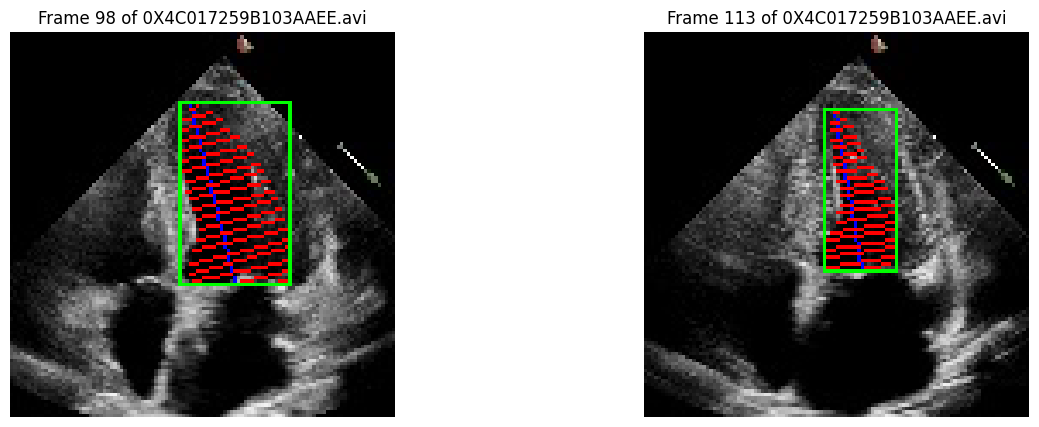

In [ ]:
df = volumeTraces[volumeTraces['FileName'] ==  filename ]
frames = extract_frames(video_path, every_n_frames=1)
plot_2_frames_sd(df,frames,filename)